🚀 Customer Churn Prediction Project

Objective: Predict which customers are likely to leave a service, helping businesses retain them effectively.

Highlights:

🧩 Problem: Customer churn is costly; retaining existing customers is cheaper than acquiring new ones.

📊 Data Analysis: Explore patterns in customer behavior, demographics, and account activity.

🛠️ Machine Learning Workflow:

Data preprocessing & cleaning

Feature engineering

Model selection & training

Evaluation & comparison of algorithms

🤖 Models Used: Logistic Regression, Decision Trees, Random Forest, ANN (if applied)

📈 Outcome: Identify at-risk customers and provide actionable insights for retention strategies.

🎯 Goal: Reduce churn, improve customer loyalty, and support business growth.

In [1]:
import pandas as pd
import numpy as np

# Data Cleaning and Processing

In [2]:
F1 =  pd.read_csv('C:/Users/Rahul/Desktop/PROJECT 1/datasets/customer_churn_dataset-testing-master.csv')

In [3]:
F1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
F2 =  F1.drop(['CustomerID'],axis = 'columns')

In [6]:
F2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
print(F2.columns)

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [9]:
F2['Gender'] = le.fit_transform(F2['Gender'])
F2['Subscription Type'] = le.fit_transform(F2['Subscription Type'])
F2['Contract Length'] = le.fit_transform(F2['Contract Length'])

In [10]:
F2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0


In [11]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                64374 non-null  int64
 1   Gender             64374 non-null  int64
 2   Tenure             64374 non-null  int64
 3   Usage Frequency    64374 non-null  int64
 4   Support Calls      64374 non-null  int64
 5   Payment Delay      64374 non-null  int64
 6   Subscription Type  64374 non-null  int64
 7   Contract Length    64374 non-null  int64
 8   Total Spend        64374 non-null  int64
 9   Last Interaction   64374 non-null  int64
 10  Churn              64374 non-null  int64
dtypes: int64(11)
memory usage: 5.4 MB


# Datasplit

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = F2.drop(['Churn'],axis = 'columns')
y = F2.Churn

In [14]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18


In [15]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((51499, 10), (12875, 10), (51499,), (12875,))

# Model Training

# 1.logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [19]:
reg.fit(X_train,y_train)

C:\Users\Rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
reg.score(X_train,y_train),reg.score(X_test,y_test)

(0.8233946290219227, 0.8287378640776699)

In [21]:
reg.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], shape=(12875,))

# 2.XGB Classifier

In [22]:
from xgboost import XGBClassifier

In [23]:
model = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 42
)

In [24]:
model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9999029107361308, 0.9996893203883496)

In [26]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], shape=(12875,))

# 3. CatBoostClssifier

In [27]:
from catboost import CatBoostClassifier

In [28]:
model_1 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

In [29]:
model_1.fit(X_train,y_train)

0:	total: 177ms	remaining: 1m 28s
100:	total: 5.74s	remaining: 22.7s
200:	total: 11s	remaining: 16.3s
300:	total: 15.7s	remaining: 10.4s
400:	total: 19.9s	remaining: 4.91s
499:	total: 24s	remaining: 0us


In [30]:
model_1.score(X_train,y_train),model_1.score(X_test,y_test)

(np.float64(1.0), np.float64(0.9999223300970874))

# Evaluation Methods

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve
from matplotlib import pyplot as plt

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
models = [reg,model,model_1]

# Confusuion_matric & Classification_report

In [34]:
import seaborn as sn


def confusion_matrix_graph(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    sn.heatmap(cm,annot = True)
    plt.title(i)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()
    return

def report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return

    

    

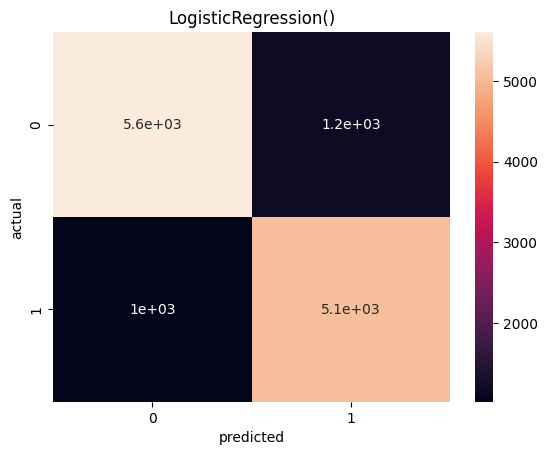

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



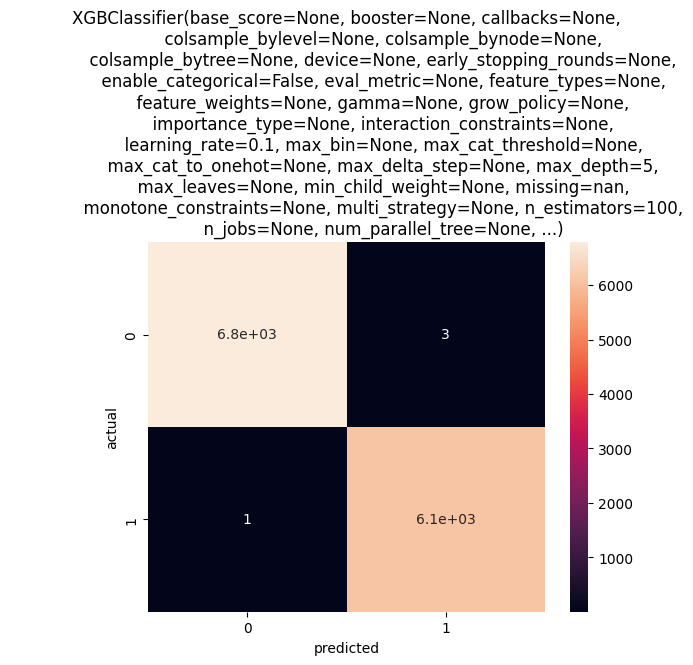

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



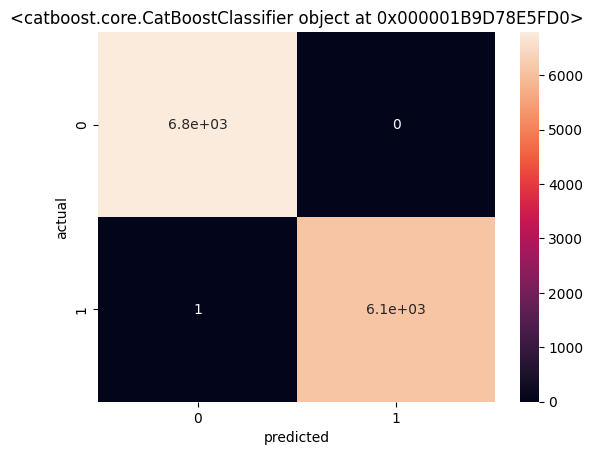

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [35]:
for i in models:
    confusion_matrix_graph(i)
    report(i)
    

# ROC & PR Curve

In [36]:
def roc(model):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr ,tpr , threshold = roc_curve(y_test,y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(model)
    plt.legend()
    plt.show()
    return

def pr(model):
    y_prob = model.predict_proba(X_test)[:,1]
    precision ,recall, threshold = precision_recall_curve(y_test,y_prob)
    plt.plot(recall , precision)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title(model)
    plt.legend()
    plt.show()
    return
    
    

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


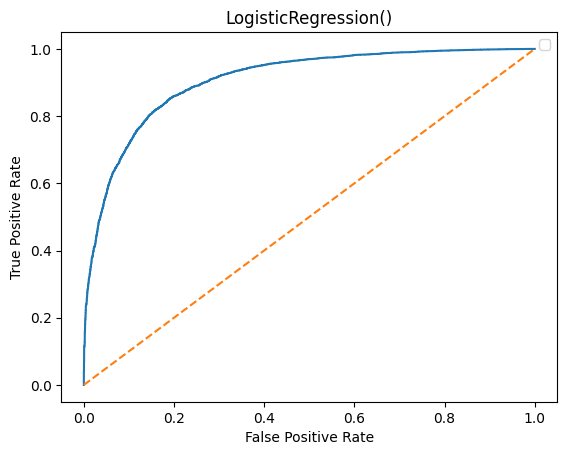

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


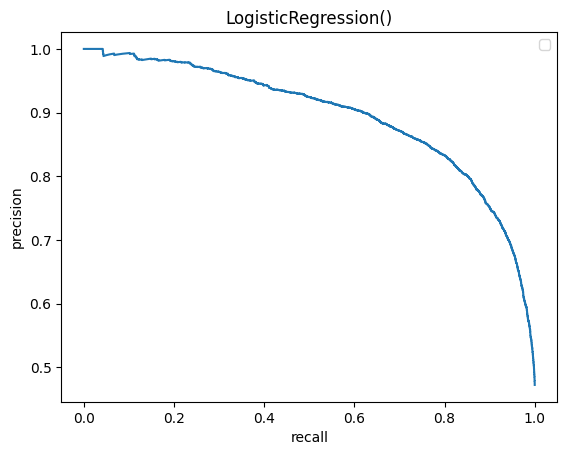

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


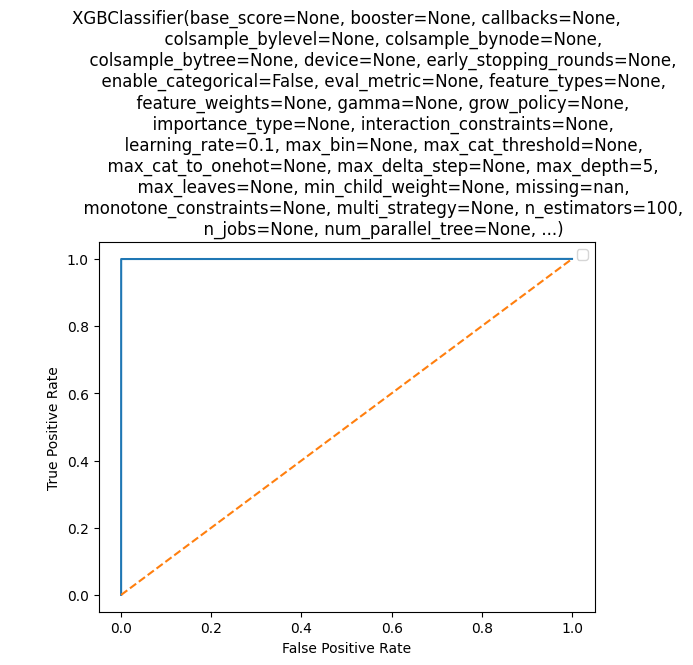

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


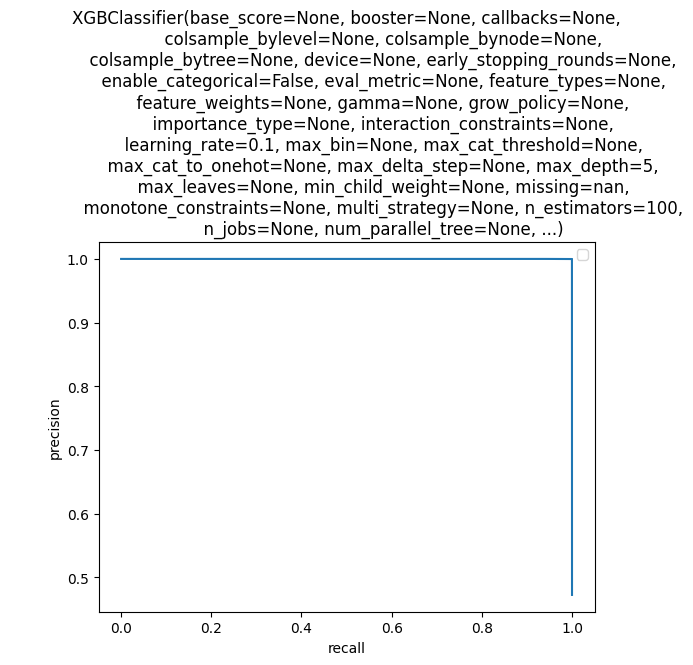

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


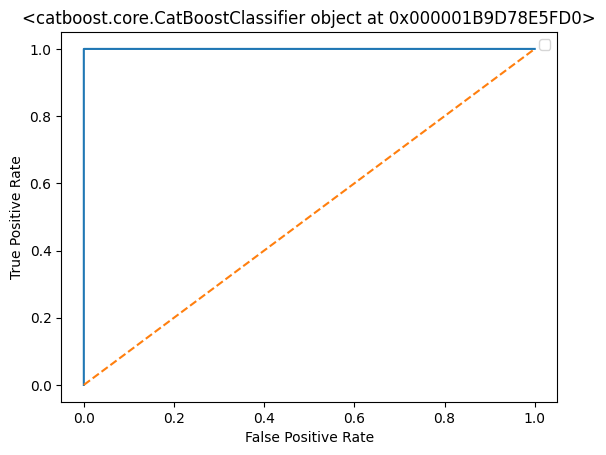

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14424\2589050876.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


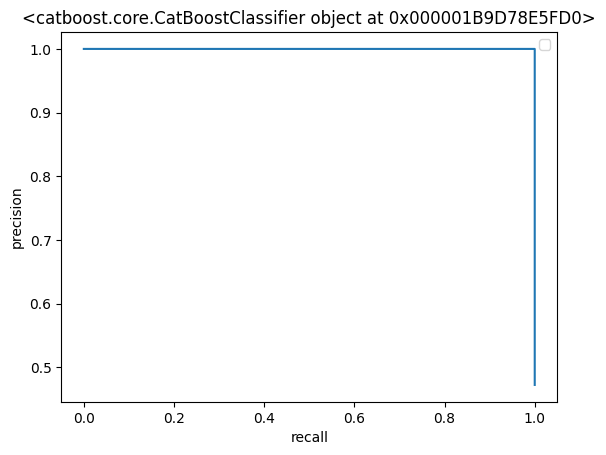

In [37]:
for i in models:
    roc(i)
    pr(i)